# <center>**PROYECTO 8**</center> 

# Descripción del proyecto.

La compañía móvil Megaline no está satisfecha al ver que muchos de sus clientes utilizan planes heredados. Quieren desarrollar un modelo que pueda analizar el comportamiento de los clientes y recomendar uno de los nuevos planes de Megaline: Smart o Ultra.

##  Revisión dimensional de datos y planeación.

De acuerdo a la descripción del proyecto, el objetivo es la creación de un modelo con un algoritmo de clasificación, así que se llamaran las librerias correspondientes para poder trabajar con las diferentes técnicas y ver la mas eficiente al momento de aplicarse al modelo.

### Importe de librerías 

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
import seaborn as sns
import matplotlib.pyplot as plt

### Análisis general de datos

In [18]:
df = pd.read_csv('/datasets/users_behavior.csv')
print(df.shape)
print('\n')
df.info()
print('\n')
print(df.head(5))

(3214, 5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


   calls  minutes  messages   mb_used  is_ultra
0   40.0   311.90      83.0  19915.42         0
1   85.0   516.75      56.0  22696.96         0
2   77.0   467.66      86.0  21060.45         0
3  106.0   745.53      81.0   8437.39         1
4   66.0   418.74       1.0  14502.75         0


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con la importación de datos y de librerías.
</div>

Podemos observar que el número de observaciones coinciden con las obtenidas en la fórmula: 'shape' que son de 3214, así que no hay números ausentes. 
Para el objetivo se establecerá la columna: 'is_ultra' y las características las demás columnas.

## Segmentación de datos.

### Dataframe para conjunto de prueba, entrenamiento y validación:

Se realizará una división del dataframe a una proporción de 3:1:1 (entrenamiento, validación y prueba, respectivamente)

In [19]:

# Asignación de características y objetivos al dataset original para su división.
features = df.drop(['is_ultra'], axis=1)
target = df['is_ultra']


# Dividir los datos en conjunto de entrenamiento y prueba
train_features, test_features, train_target, test_target = train_test_split(
    features, target, test_size=0.2, random_state=2468)

# Dividir el conjunto de entrenamiento en conjunto de entrenamiento y validación
train_features, valid_features, train_target, valid_target = train_test_split(
    train_features, train_target, test_size=0.25, random_state=2468)

# prueba del tamaño de los dataframes
print(test_features.shape)
print(test_target.shape)
print(train_features.shape)
print(train_target.shape)
print(valid_features.shape)
print(valid_target.shape)

(643, 4)
(643,)
(1928, 4)
(1928,)
(643, 4)
(643,)


Ahora podemos ver que la división se realizó correctamente

## Entrenamiento con diferentes modelos.

### Prueba con árbol de decisiones

En el siguiente ejercicio se determinará cual es la mejor opción para la profundidad del árbol entre 1 - 5, realizando el modelo con el conjunto de entreanamiento y ver su eficacia con el de validación, aplicando un random_state de 24680.

In [20]:
best_model = None
best_result = 0
best_depth = None

for depth in range(1, 6):
    model = DecisionTreeClassifier(random_state=24680, max_depth=depth)
    model.fit(train_features, train_target)
    result = model.score(valid_features, valid_target)
    if result > best_result:
        best_model = model
        best_result = result
        best_depth = depth

print(f"Exactitud del mejor modelo en el conjunto de validación: {
      best_result} con una profundidad de: {best_depth}")

Exactitud del mejor modelo en el conjunto de validación: 0.7822706065318819 con una profundidad de: 4


### Prueba con bosque aleatorio

En el siguiente ejercicio se determinará cual es la mejor opción con un bosque aleatorio entre 1 - 21, realizando el modelo con el conjunto de entreanamiento y ver su eficacia con el de validación, aplicando un random_state de 24680.

In [21]:
best_score = 0
best_est = 0
for est in range(1, 51):
    model = RandomForestClassifier(random_state=24680, n_estimators=est)
    model.fit(train_features, train_target)
    score = model.score(valid_features, valid_target)
    if score > best_score:
        best_score = score
        best_est = est

print(f"La exactitud del mejor modelo en el conjunto de validación (n_estimators = {
      best_est}): {best_score}")

La exactitud del mejor modelo en el conjunto de validación (n_estimators = 47): 0.7900466562986003


### Prueba con bosque aleatorio e hiperparámetro de profundidad


se realizará la siguiente prueba para ver si se puede ajustar con menos árboles y una profundidad de 1 a 5, para que no caiga en sobreajuste.


In [22]:
best_score = 0
best_est = 0
best_depth = 0

for est in range(10, 51, 10):
    for depth in range(1, 6):  # Puedes ajustar el rango de profundidad según tus necesidades
        model = RandomForestClassifier(
            random_state=24680, n_estimators=est, max_depth=depth)
        model.fit(train_features, train_target)
        score = model.score(valid_features, valid_target)
        if score > best_score:
            best_score = score
            best_est = est
            best_depth = depth

print(f"La exactitud del mejor modelo en el conjunto de validación (n_estimators = {
      best_est}, max_depth = {best_depth}): {best_score}")

La exactitud del mejor modelo en el conjunto de validación (n_estimators = 30, max_depth = 5): 0.7962674961119751


### Prueba con regresión logística.

En el siguiente ejercicio se determinará cual es la mejor opción para la prueba con regresión logística, realizando el modelo con el conjunto de entreanamiento y ver su eficacia tanto con el de validación como con el de entrenamiento, aplicando un random_state de 24680.

In [23]:
model = LogisticRegression(random_state=24680, solver='liblinear')
model.fit(train_features, train_target)
score_train = model.score(train_features, train_target)
score_valid = model.score(valid_features, valid_target)

print("Accuracy del modelo de regresión logística en el conjunto de entrenamiento:", score_train)
print("Accuracy del modelo de regresión logística en el conjunto de validación:", score_valid)

Accuracy del modelo de regresión logística en el conjunto de entrenamiento: 0.7048755186721992
Accuracy del modelo de regresión logística en el conjunto de validación: 0.6858475894245724


De todos los modelos con los que se realizó la prueba, el mejor es el bosque aleatorio con hiperparámetro de profundidad y el menos eficiente con bastante diferencia fue el de regresión logística. 
Entre los bosques aleatorios la diferencia es mínima, sin embargo, se seleccionó el de profundidad ya que se ajusta perfectamente a los tipos de datos que estamos usando para este ejercicio ya que no son complejos y al aplicar una profundidad sin tantos árboles correrá mas rapido el algoritmo, sin mencionar que con mejor resultado.

## Comprobación de la calidad del modelo seleccionado con conjunto de prueba

In [24]:
# Entrenamiento del mejor modelo con todos los datos de entrenamiento
best_model = RandomForestClassifier(
    random_state=24680, n_estimators=30, max_depth=5)
best_model.fit(train_features, train_target)

# Evaluación del modelo en el conjunto de datos de prueba
accuracy_test = best_model.score(test_features, test_target)
print(f"Exactitud del mejor modelo en el conjunto de prueba: {accuracy_test}")

Exactitud del mejor modelo en el conjunto de prueba: 0.8055987558320373


La exactitud con el modelo seleccionado arrojó un 0.8 la cual podría ser considerado como aceptable, aunque hay mucho campo de mejora si se llega a analizar a mas profundidad las diferentes características de cada plan y ver la relevancia con cada plan. 

## Prueba de cordura al modelo seleccionado.

In [25]:
# asignación y entrenamiento del modelo dummy para testeo
dummy_model = DummyClassifier(strategy="most_frequent", random_state=24680)
dummy_model.fit(train_features, train_target)

accuracy_dummy = dummy_model.score(test_features, test_target)
print(f"Exactitud del modelo dummy es de: {accuracy_dummy}")

Exactitud del modelo dummy es de: 0.6936236391912908


De acuerdo al resultado con el modelo dummy, nuestro modelo seleccionado es aún mejor.

Conclusión: La primer prueba fue la matriz de confusión, la cual nos arrojó: 422 verdaderos positivos, 24 falsos positivos, 96 verdaderos negativos y 101 falsos negativos . la exactitud de nuestro modelo es del 80% junto con la precision de encontrar positivos. Tenemos un F1 score de 0.6 que es el equilibrio entre el recall y la precisión y es bueno. 
El campo de mejora aquí es el recall que es de 0.48, significando que el programa tiene dificultades para clasificar los positivos, en este caso el plan ultra. en nuestro modelo no hay mucho problema ya que la exactitud y la precision es buena pero si se incrementan los datos, a la larga el algoritmo puede comenzar a clasifcar los datos como negativos, siendo positivos. 

Una razón para explicar la dificultad de la identificación es que se tiene una mayor población de plan smart y el ultra al ser minoría, habrá ciertos parametros que el algoritmo no identifica correctamente y tendría que ajustarse a mano o conseguir mas datos sobre los planes ultra. 

## Paso extra

A continuación realizaré diferentes gráficas para las características de los conjuntos, para ver la comparación entre los planes pronosticados de manera erronea y los verdaderos.

In [26]:
test_df = pd.concat([test_features, test_target], axis=1)

# Crear un DataFrame para almacenar las filas correspondientes a las predicciones incorrectas
incorrect_df = pd.DataFrame(columns=test_df.columns)

# Iterar sobre los índices incorrectos y agregar las filas correspondientes al nuevo DataFrame
for i in range(len(true_values)):
    if true_values[i] != test_predictions[i]:
        # Se utiliza iloc para seleccionar la fila por su índice
        fila = test_df.iloc[i]
        incorrect_df = incorrect_df.append(fila)

# Eliminar las filas correspondientes a las predicciones incorrectas del DataFrame original
new_test_df = test_df.drop(incorrect_df.index)

print("DataFrame de predicciones incorrectas:")
print(incorrect_df.head())
print("Nuevo DataFrame sin las predicciones incorrectas:")
print(new_test_df.head())

DataFrame de predicciones incorrectas:
      calls  minutes  messages   mb_used  is_ultra
1427   87.0   635.32      30.0  20478.76       1.0
2441   55.0   369.67      47.0  11584.49       1.0
565   112.0   856.90       0.0  28002.44       0.0
2074   68.0   501.10      87.0  10983.84       1.0
524    33.0   281.77      75.0  13933.01       1.0
Nuevo DataFrame sin las predicciones incorrectas:
      calls  minutes  messages   mb_used  is_ultra
2281   34.0   258.97     107.0  10294.77         0
1955   27.0   171.60       8.0   6974.14         0
172    37.0   229.15     110.0   2000.51         0
156    33.0   228.98      12.0  18113.83         0
631    69.0   389.89     103.0  22633.64         0


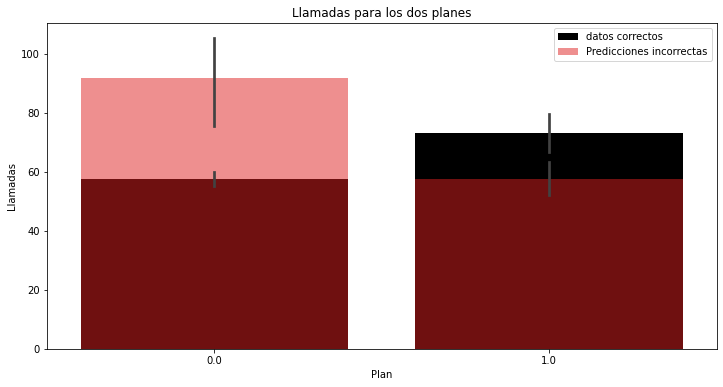

In [27]:
plt.figure(figsize=(12, 6))

# Gráfico de barras para el DataFrame test_df
sns.barplot(x='is_ultra', y='calls', data=test_df,
            color='black', label='datos correctos')

# Gráfico de barras para el DataFrame incorrect_df
sns.barplot(x='is_ultra', y='calls', data=incorrect_df,
            color='red', alpha=0.5, label='Predicciones incorrectas')

plt.xlabel('Plan')
plt.ylabel('Llamadas')
plt.title('Llamadas para los dos planes')
plt.legend()
plt.show()

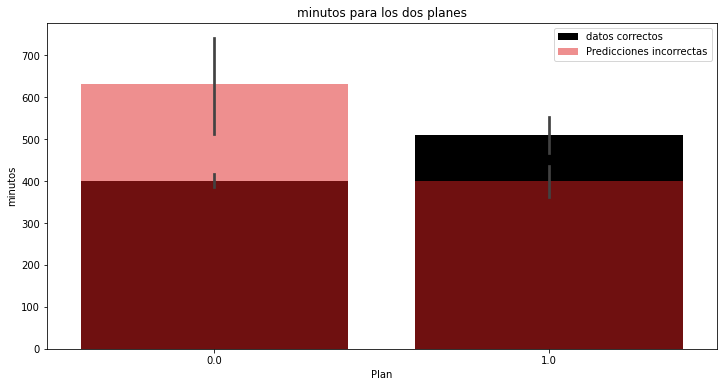

In [28]:
plt.figure(figsize=(12, 6))

# Gráfico de barras para el DataFrame test_df
sns.barplot(x='is_ultra', y='minutes', data=test_df,
            color='black', label='datos correctos')

# Gráfico de barras para el DataFrame incorrect_df
sns.barplot(x='is_ultra', y='minutes', data=incorrect_df,
            color='red', alpha=0.5, label='Predicciones incorrectas')

plt.xlabel('Plan')
plt.ylabel('minutos')
plt.title('minutos para los dos planes')
plt.legend()
plt.show()

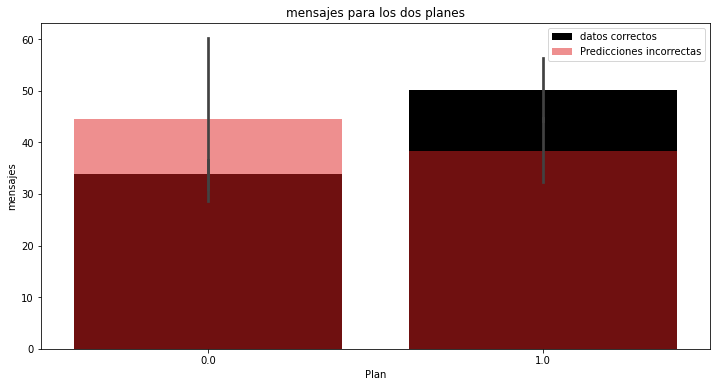

In [29]:
plt.figure(figsize=(12, 6))

# Gráfico de barras para el DataFrame test_df
sns.barplot(x='is_ultra', y='messages', data=test_df,
            color='black', label='datos correctos')

# Gráfico de barras para el DataFrame incorrect_df
sns.barplot(x='is_ultra', y='messages', data=incorrect_df,
            color='red', alpha=0.5, label='Predicciones incorrectas')

plt.xlabel('Plan')
plt.ylabel('mensajes')
plt.title('mensajes para los dos planes')
plt.legend()
plt.show()

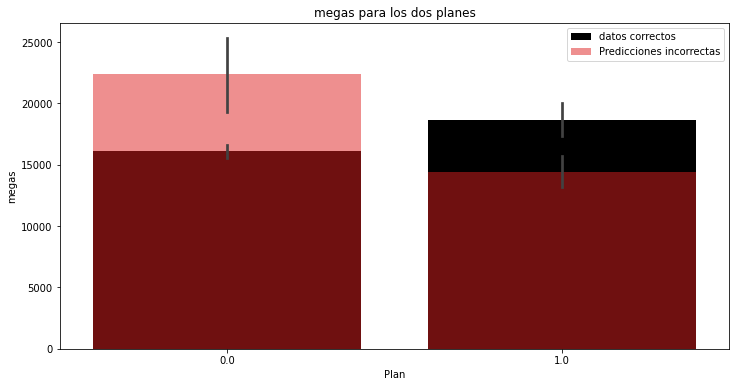

In [30]:
plt.figure(figsize=(12, 6))

# Gráfico de barras para el DataFrame test_df
sns.barplot(x='is_ultra', y='mb_used', data=test_df,
            color='black', label='datos correctos')

# Gráfico de barras para el DataFrame incorrect_df
sns.barplot(x='is_ultra', y='mb_used', data=incorrect_df,
            color='red', alpha=0.5, label='Predicciones incorrectas')

plt.xlabel('Plan')
plt.ylabel('megas')
plt.title('megas para los dos planes')
plt.legend()
plt.show()

Conclusión: ésta última revisión nos muestra una comparación entre los datos pronosticados de manera erronea y los correctos ya que hay un recall alto. De ser necesario modificar algún parametro del algoritmo se pudiera llegar a una decisión mas correcta o cercana a la realidad.
En los gráficos se puede ver que las llamadas realizadas y los minutos son los problemáticos ya que el promedio fue cerca de 60 llamadas para el plan smart y el algoritmo lo está catalogando entre 95 y 100 llamadas por mes. 
En cuanto a los minutos, el plan smart promedio fue cerca de 400 min y el algoritmo para los datos erroneos fue entre 600 y 650 min.
El gráfico de los mensajes esta muy cerca de los verdaderos datos y el de megas hay una diferencia entre los verdaderos y los erroneos en el plan smart por cerca de 1 gb de diferencia entre los datos reales y los pronosticados. 

Éstas serían algunas áreas de mejoras para trabajar con el algoritmo en dado de requerir una mayor exactitud a la hora de pronosticar aquellos con un plan minoritario y mas difícil de predecir, que es el 'ultra'.

<div class="alert alert-block alert-success">
    
# Comentarios generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Todo corregido. Has aprobado un nuevo proyecto. ¡Felicitaciones!
</div>